In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
file='indeed_job_dataset.csv'

In [3]:
indeed_df=pd.read_csv(file,sep=',')
indeed_df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
group_indeed=indeed_df.groupby('Job_Type')
s=['python','sql','machine learning','r','hadoop','tableau','sas','spark','java','Others']
s_0=group_indeed[s[0]].value_counts()
s_1=group_indeed[s[1]].value_counts()
s_2=group_indeed[s[2]].value_counts()
s_3=group_indeed[s[3]].value_counts()
s_4=group_indeed[s[4]].value_counts()
s_5=group_indeed[s[5]].value_counts()
s_6=group_indeed[s[6]].value_counts()
s_7=group_indeed[s[7]].value_counts()
s_8=group_indeed[s[8]].value_counts()


skills_df=pd.DataFrame({'python':s_0,
                       'sql':s_1,
                       'machine learning':s_2,
                       'r':s_3,
                       'hadoop':s_4,
                       'tableau':s_5,
                       'sas':s_6,
                       'spark':s_7,
                       'java':s_8})
new_skills_df=skills_df.reset_index(inplace=False,drop=False)
new_skills_df

,level_0,level_1,python,sql,machine learning,r,hadoop,tableau,sas,spark,java
0,data_analyst,0,1281,749,1627,1337,1667,1255,1483,1726,1692
1,data_analyst,1,512,1044,166,456,126,538,310,67,101
2,data_engineer,0,478,512,1090,1151,618,1165,1312,660,675
3,data_engineer,1,901,867,289,228,761,214,67,719,704
4,data_scientist,0,631,1350,701,993,1716,2059,1979,1798,1868
5,data_scientist,1,1912,1193,1842,1550,827,484,564,745,675


In [5]:
job_count=group_indeed['Job_Title'].count()
job_count

Job_Type
data_analyst      1793
data_engineer     1379
data_scientist    2543
Name: Job_Title, dtype: int64

In [6]:
skill_count=new_skills_df[new_skills_df['level_1']==1]
skill_count_new=skill_count.rename(columns={'level_0':'Job Type '})
skill_count_df=skill_count_new.drop(['level_1'], axis=1)
skill_count_df['Job Count']=[1793,1379,2543]
skill_count_df

,Job Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Job Count
1,data_analyst,512,1044,166,456,126,538,310,67,101,1793
3,data_engineer,901,867,289,228,761,214,67,719,704,1379
5,data_scientist,1912,1193,1842,1550,827,484,564,745,675,2543


In [7]:
skill_count_df['python_pct']=skill_count_df['python']/skill_count_df['Job Count']*100
skill_count_df['sql_pct']=skill_count_df['sql']/skill_count_df['Job Count']*100
skill_count_df['ML_pct']=skill_count_df['machine learning']/skill_count_df['Job Count']*100
skill_count_df['r_pct']=skill_count_df['r']/skill_count_df['Job Count']*100
skill_count_df['hadoop_pct']=skill_count_df['hadoop']/skill_count_df['Job Count']*100
skill_count_df['tableau_pct']=skill_count_df['tableau']/skill_count_df['Job Count']*100
skill_count_df['sas_pct']=skill_count_df['sas']/skill_count_df['Job Count']*100
skill_count_df['spark_pct']=skill_count_df['spark']/skill_count_df['Job Count']*100
skill_count_df['java_pct']=skill_count_df['java']/skill_count_df['Job Count']*100
skill_count_df

,Job Type,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Job Count,python_pct,sql_pct,ML_pct,r_pct,hadoop_pct,tableau_pct,sas_pct,spark_pct,java_pct
1,data_analyst,512,1044,166,456,126,538,310,67,101,1793,28.555494,58.226436,9.258226,25.432236,7.027328,30.005577,17.289459,3.736754,5.633017
3,data_engineer,901,867,289,228,761,214,67,719,704,1379,65.337201,62.871646,20.957215,16.533720,55.184917,15.518492,4.858593,52.139231,51.051487
5,data_scientist,1912,1193,1842,1550,827,484,564,745,675,2543,75.186787,46.913095,72.434133,60.951632,32.520645,19.032639,22.178529,29.296107,26.543453


In [8]:
pos=list(range(len(skill_count_df['python'])))
width=0.05

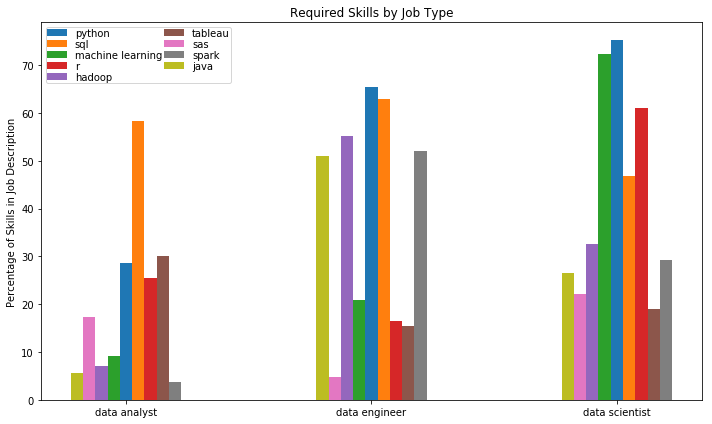

In [9]:
plt.figure(figsize=(10,6))
plt.bar(pos,skill_count_df['python_pct'],width,label='python')
plt.bar([p+width for p in pos],skill_count_df['sql_pct'],width,label='sql')
plt.bar([p-width for p in pos],skill_count_df['ML_pct'],width,label='machine learning')
plt.bar([p+2*width for p in pos],skill_count_df['r_pct'],width,label='r')
plt.bar([p-2*width for p in pos],skill_count_df['hadoop_pct'],width,label='hadoop')
plt.bar([p+3*width for p in pos],skill_count_df['tableau_pct'],width,label='tableau')
plt.bar([p-3*width for p in pos],skill_count_df['sas_pct'],width,label='sas')
plt.bar([p+4*width for p in pos],skill_count_df['spark_pct'],width,label='spark')
plt.bar([p-4*width for p in pos],skill_count_df['java_pct'],width,label='java')
plt.xticks(pos,['data analyst','data engineer','data scientist'])
plt.legend(ncol=2,borderpad=0.1,labelspacing=0.1,columnspacing=0.2)

plt.ylabel('Percentage of Skills in Job Description')
plt.title('Required Skills by Job Type')
plt.tight_layout()
plt.savefig('skills_by_job_type',dpi=1000)
plt.show()

In [10]:
s_indeed=indeed_df.groupby('Queried_Salary')
sk=['python','sql','machine learning','r','hadoop','tableau','sas','spark','java']
sk_0=s_indeed[sk[0]].sum()
sk_1=s_indeed[sk[1]].sum()
sk_2=s_indeed[sk[2]].sum()
sk_3=s_indeed[sk[3]].sum()
sk_4=s_indeed[sk[4]].sum()
sk_5=s_indeed[sk[5]].sum()
sk_6=s_indeed[sk[6]].sum()
sk_7=s_indeed[sk[7]].sum()
sk_8=s_indeed[sk[8]].sum()

job_count_salary=s_indeed['Job_Title'].count()

salary_df=pd.DataFrame({'python':sk_0,
                       'sql':sk_1,
                       'machine learning':sk_2,
                       'r':sk_3,
                       'hadoop':sk_4,
                       'tableau':sk_5,
                       'sas':sk_6,
                       'spark':sk_7,
                       'java':sk_8,
                       'Job Count':job_count_salary})
salary_df.reset_index(inplace=True,drop=False)
salary_df['order']=[3,4,5,2,1,6]
s_s_df=salary_df.sort_values(['order'])
s_s_df

,Queried_Salary,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Job Count,order
4,<80000,144,367,67,148,12,162,131,9,34,788,1
3,80000-99999,412,618,201,311,97,283,156,71,102,953,2
0,100000-119999,861,840,579,648,410,357,288,347,375,1394,3
1,120000-139999,957,720,687,601,593,253,189,536,474,1292,4
2,140000-159999,674,388,533,376,424,138,124,397,359,873,5
5,>160000,277,171,230,150,178,43,53,171,136,415,6


In [11]:
s_s_df['python_pct']=s_s_df['python']/s_s_df['Job Count']*100
s_s_df['sql_pct']=s_s_df['sql']/s_s_df['Job Count']*100
s_s_df['ML_pct']= s_s_df['machine learning']/s_s_df['Job Count']*100
s_s_df['r_pct']=s_s_df['r']/s_s_df['Job Count']*100
s_s_df['hadoop_pct']=s_s_df['hadoop']/s_s_df['Job Count']*100
s_s_df['tableau_pct']=s_s_df['tableau']/s_s_df['Job Count']*100
s_s_df['sas_pct']=s_s_df['sas']/s_s_df['Job Count']*100
s_s_df['spark_pct']=s_s_df['spark']/s_s_df['Job Count']*100
s_s_df['java_pct']=s_s_df['java']/s_s_df['Job Count']*100
s_s_df

,Queried_Salary,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,...,order,python_pct,sql_pct,ML_pct,r_pct,hadoop_pct,tableau_pct,sas_pct,spark_pct,java_pct
4,<80000,144,367,67,148,12,162,131,9,34,...,1,18.274112,46.573604,8.502538,18.781726,1.522843,20.558376,16.624365,1.142132,4.314721
3,80000-99999,412,618,201,311,97,283,156,71,102,...,2,43.231899,64.847849,21.091291,32.633788,10.178384,29.695698,16.369360,7.450157,10.703043
0,100000-119999,861,840,579,648,410,357,288,347,375,...,3,61.764706,60.258250,41.535151,46.484935,29.411765,25.609756,20.659971,24.892396,26.901004
1,120000-139999,957,720,687,601,593,253,189,536,474,...,4,74.071207,55.727554,53.173375,46.517028,45.897833,19.582043,14.628483,41.486068,36.687307
2,140000-159999,674,388,533,376,424,138,124,397,359,...,5,77.205040,44.444444,61.053837,43.069874,48.568156,15.807560,14.203895,45.475372,41.122566
5,>160000,277,171,230,150,178,43,53,171,136,...,6,66.746988,41.204819,55.421687,36.144578,42.891566,10.361446,12.771084,41.204819,32.771084


In [12]:
pos=list(range(len(s_s_df['Queried_Salary'])))
width=0.05

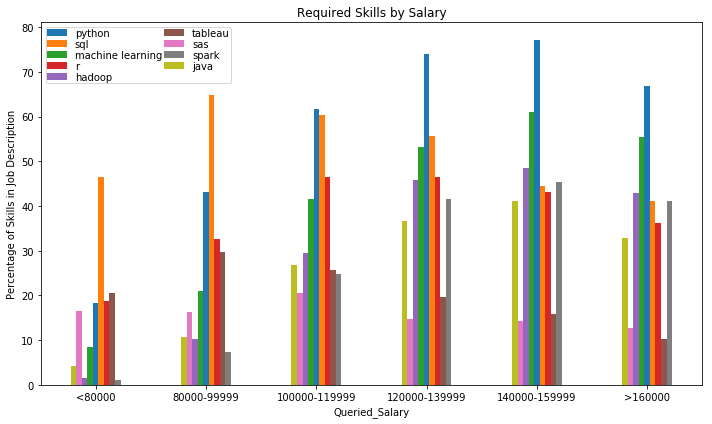

In [13]:
plt.figure(figsize=(10,6))
plt.bar(pos,s_s_df['python_pct'],width,label='python')
plt.bar([p+width for p in pos],s_s_df['sql_pct'],width,label='sql')
plt.bar([p-width for p in pos],s_s_df['ML_pct'],width,label='machine learning')
plt.bar([p+2*width for p in pos],s_s_df['r_pct'],width,label='r')
plt.bar([p-2*width for p in pos],s_s_df['hadoop_pct'],width,label='hadoop')
plt.bar([p+3*width for p in pos],s_s_df['tableau_pct'],width,label='tableau')
plt.bar([p-3*width for p in pos],s_s_df['sas_pct'],width,label='sas')
plt.bar([p+4*width for p in pos],s_s_df['spark_pct'],width,label='spark')
plt.bar([p-4*width for p in pos],s_s_df['java_pct'],width,label='java')
plt.xticks(pos,s_s_df['Queried_Salary'])
plt.legend(ncol=2,borderpad=0.1,labelspacing=0.1,columnspacing=0.2)
plt.xlabel('Queried_Salary')
plt.ylabel('Percentage of Skills in Job Description')
plt.title('Required Skills by Salary')
plt.tight_layout()
plt.savefig('Required Skills by Salary',dpi=1000)
plt.show()